### **BPIC 2017 - No milestone**


In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from data.processor import *
from data.args import *

from tensorflow.keras.utils import to_categorical


### Define the experiment parameters

In [2]:
milestone = 'All' #'A_PREACCEPTED' # 'W_Nabellen offertes', 'All'
experiment =  'OHE'#'Standard'#'OHE', 'No_loops'
n_size = 5
max_size = 1000 #  3, 5, 10, 15, 20, 30, 50, 95
min_size = 0  # 0, 3, 5, 10, 15, 20, 30, 50

### Setting up the key parameters


In [3]:
# # For local environment only

MY_WORKSPACE_DIR = os.path.join(os.getcwd(),'BPIC17')
MILESTONE_DIR = os.path.join(os.path.join(MY_WORKSPACE_DIR, milestone),experiment)

In [4]:
args = get_parameters('bpic17', MILESTONE_DIR, MY_WORKSPACE_DIR, milestone, experiment,n_size)
args

{'folder': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC17\\All\\OHE\\output_files',
 'lstm_act': None,
 'dense_act': None,
 'optim': 'Adam',
 'norm_method': 'lognorm',
 'model_type': 'shared_cat',
 'l_size': 50,
 'n_size': 5,
 'file_name': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC17\\BPIC_2017_Prefixes.csv',
 'file_name_all': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC17\\BPIC_2017_Prefixes_all.csv',
 'processed_file_name': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC17\\All\\OHE\\BPIC_2

In [5]:
#This code will be specific for all next activity prediction only, since we save the models and vectors by prefix length groups
if milestone == 'All':
  args['indexes'] = MILESTONE_DIR+'indexes_'+str(max_size)+'.p'
  args['pre_index'] = MILESTONE_DIR+'pre_index_'+str(max_size)+'.p'
  args['processed_test_vec'] = MILESTONE_DIR+'vec_test_'+str(max_size)+'.p'
  args['processed_training_vec'] = MILESTONE_DIR+'vec_training_'+str(max_size)+'.p'
  args['weights'] = MILESTONE_DIR+'weights_'+str(max_size)+'.p'

args

{'folder': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC17\\All\\OHE\\output_files',
 'lstm_act': None,
 'dense_act': None,
 'optim': 'Adam',
 'norm_method': 'lognorm',
 'model_type': 'shared_cat',
 'l_size': 50,
 'n_size': 5,
 'file_name': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC17\\BPIC_2017_Prefixes.csv',
 'file_name_all': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC17\\BPIC_2017_Prefixes_all.csv',
 'processed_file_name': 'c:\\Users\\20182009\\Documents\\Master DSAI\\y2 q1\\2IMI00 seminar process analytics\\replicationStudy\\Shared-and-Specialised-Attention-based-Interpretable-Models\\BPIC17\\All\\OHE\\BPIC_2

### Data Preprocessing

In [6]:
if milestone == 'All':
  log_df = pd.read_csv(args['file_name_all'])
  log_df = log_df.reset_index(drop=True)
else:
  log_df = pd.read_csv(args['file_name'])
  log_df = log_df.reset_index(drop=True)

log_df.head()

,prefix_id,caseid,task,role,end_timestamp,trace_start,timelapsed,next_activity,milestone,milestone_id,task_index,prefix_length,timelapsed_2
0,Application_1000311556_10,Application_1000311556,A_Create Application,User_71,2016-04-05 01:56:37.6750000,2016-04-05 01:56:37.6750000,0,W_Call after offers,O_Cancelled,10.0,1.0,10.0,0.0
1,Application_1000311556_1,Application_1000311556,A_Create Application,User_71,2016-04-05 01:56:37.6750000,2016-04-05 01:56:37.6750000,0,W_Complete application,A_Create Application,1.0,1.0,1.0,0.0
2,Application_1000311556_7,Application_1000311556,A_Create Application,User_71,2016-04-05 01:56:37.6750000,2016-04-05 01:56:37.6750000,0,A_Complete,O_Sent (mail and online),7.0,1.0,7.0,0.0
3,Application_1000311556_6,Application_1000311556,A_Create Application,User_71,2016-04-05 01:56:37.6750000,2016-04-05 01:56:37.6750000,0,O_Sent (mail and online),O_Created,6.0,1.0,6.0,0.0
4,Application_1000311556_9,Application_1000311556,A_Create Application,User_71,2016-04-05 01:56:37.6750000,2016-04-05 01:56:37.6750000,0,O_Cancelled,A_Cancelled,9.0,1.0,9.0,0.0


Milestone Extraction

We expect to filter the prefixes by the milestone, and train the model for each milestone separately to observe if there will be an improvement in the model explainability as well as performance


In [7]:
if milestone != 'All':
  log_df = log_df[log_df['milestone'] == milestone]
else:
  log_df = log_df[(log_df['prefix_length'] > min_size) & (log_df['prefix_length'] <= max_size) ]

#### Data Analysis

In [8]:
#Checking the Balance of the Dataset, by the target variable
print('Distribution of cases by the target variable - next event\n')
print(log_df.groupby(['next_activity'])['prefix_id'].nunique())

Distribution of cases by the target variable - next event

next_activity
A_Accepted                   9988
A_Cancelled                  3336
A_Complete                   9940
A_Concept                    9989
A_Denied                     1217
A_Incomplete                 7338
A_Pending                    5418
A_Submitted                  6442
A_Validating                12368
O_Accepted                   5419
O_Cancelled                  6665
O_Create Offer              13615
O_Created                   13614
O_Refused                    1499
O_Returned                   7372
O_Sent (mail and online)    12566
O_Sent (online only)          640
W_Assess potential fraud       90
W_Call after offers         10968
W_Call incomplete files      7329
W_Complete application      10001
W_Handle leads               6451
W_Validate application      12413
Name: prefix_id, dtype: int64


We can see that there is an imbalance in the dataset, by the next activity name, as well as a very high dimensionality in the target variable.
Therefore, we can reduce the imbalance and high dimensionality of data by grouping some of the activity name.


Balancing the dataset


In [9]:
def balance(df):
  # Dictonary with the mapping of columns
  
  #based on the paper : BPIC_2012 Winner, DOI: 10.1007/978-3-642-36285-9_24

  # group_dict = {'A_ACCEPTED':'A_ACCEPTED',    
  #   'A_ACTIVATED' :   'A_APPROVED_ACTIVATED',
  #   'A_APPROVED':  'A_APPROVED_ACTIVATED',
  #   'A_CANCELLED': 'A_CANCELLED_DECLINED' ,
  #   'A_DECLINED': 'A_CANCELLED_DECLINED' ,
  #   'A_PARTLYSUBMITTED': 'REDUNDANT',
  #   'A_PREACCEPTED':'A_PREACCEPTED',
  #   'A_REGISTERED' : 'REDUNDANT',
  #   'O_ACCEPTED' : 'REDUNDANT',
  #   'O_CANCELLED' :  'O_CANCELLED_DECLINED' ,
  #   'O_CREATED':'REDUNDANT',
  #   'O_DECLINED' :'O_CANCELLED_DECLINED' ,
  #   'O_SELECTED' : 'REDUNDANT', 
  #   'O_SENT':'O_SENT',
  #   'O_SENT_BACK' : 'O_SENT_BACK',
  #   'W_Afhandelen leads' :  'W_Afhandelen leads',
  #   'W_Completeren aanvraag': 'W_Completeren aanvraag',
  #   'W_Nabellen incomplete dossiers':'W_Nabellen incomplete dossiers',
  #   'W_Nabellen offertes':'W_Nabellen offertes',
  #   'W_Valideren aanvraag' : 'W_Valideren aanvraag'}


  # df['next_activity'].replace(group_dict, inplace=True)
  # #Dropping the minority classes
  # df = df.drop(df[df.next_activity == 'REDUNDANT'].index)
 

  return df

In [10]:
log_df = balance(log_df)



#replacing empty cells of categorical columns with 'none'
log_df = log_df.fillna('none')

In [11]:
# Check the balance

print('Distribution of cases by the target variable - next event\n')
print(log_df.groupby(['next_activity'])['prefix_id'].nunique())

Distribution of cases by the target variable - next event

next_activity
A_Accepted                   9988
A_Cancelled                  3336
A_Complete                   9940
A_Concept                    9989
A_Denied                     1217
A_Incomplete                 7338
A_Pending                    5418
A_Submitted                  6442
A_Validating                12368
O_Accepted                   5419
O_Cancelled                  6665
O_Create Offer              13615
O_Created                   13614
O_Refused                    1499
O_Returned                   7372
O_Sent (mail and online)    12566
O_Sent (online only)          640
W_Assess potential fraud       90
W_Call after offers         10968
W_Call incomplete files      7329
W_Complete application      10001
W_Handle leads               6451
W_Validate application      12413
Name: prefix_id, dtype: int64


In [12]:

#minority reduction. if certain samples are < 5, reduce via below

#log_df = log_df.drop(log_df[log_df.next_activity == 'W_Afhandelen leads'].index)



Reduce Loops

Function : `reduce_loops(df)`, Author: Manuel Camargo, Edited by: Bemali Wickramanayake

In [13]:
if experiment == 'No_Loops':
  log_df = reduce_loops(log_df)

#### Data Encoding and Vectorization

Index creating for data encoding
Function : `create_index(log_df, column)`, Author: Manuel Camargo, Edited by: Bemali Wickramanayake

In [14]:
# Index creation for activity

ac_index = create_index(log_df, 'task')
index_ac = {v: k for k, v in ac_index.items()}

# Index creation for unit

rl_index = create_index(log_df, 'role')
index_rl = {v: k for k, v in rl_index.items()}

# Index creation for next activity

ne_index = create_index(log_df, 'next_activity')

index_ne = {v: k for k, v in ne_index.items()}

#mapping the dictionary values as columns in the dataframe
log_df['ac_index'] = log_df['task'].map(ac_index)
log_df['rl_index'] = log_df['role'].map(rl_index)
log_df['ne_index'] = log_df['next_activity'].map(ne_index)

print(rl_index)
print(index_rl)
log_df.head()

{'none': 0, 'User_1': 1, 'User_10': 2, 'User_100': 3, 'User_101': 4, 'User_102': 5, 'User_103': 6, 'User_104': 7, 'User_105': 8, 'User_106': 9, 'User_107': 10, 'User_108': 11, 'User_109': 12, 'User_11': 13, 'User_110': 14, 'User_111': 15, 'User_112': 16, 'User_113': 17, 'User_114': 18, 'User_115': 19, 'User_116': 20, 'User_117': 21, 'User_118': 22, 'User_119': 23, 'User_12': 24, 'User_120': 25, 'User_121': 26, 'User_122': 27, 'User_123': 28, 'User_124': 29, 'User_125': 30, 'User_126': 31, 'User_127': 32, 'User_128': 33, 'User_129': 34, 'User_13': 35, 'User_130': 36, 'User_131': 37, 'User_132': 38, 'User_133': 39, 'User_134': 40, 'User_135': 41, 'User_136': 42, 'User_137': 43, 'User_138': 44, 'User_139': 45, 'User_14': 46, 'User_140': 47, 'User_141': 48, 'User_142': 49, 'User_143': 50, 'User_144': 51, 'User_15': 52, 'User_16': 53, 'User_17': 54, 'User_18': 55, 'User_19': 56, 'User_2': 57, 'User_20': 58, 'User_21': 59, 'User_22': 60, 'User_23': 61, 'User_24': 62, 'User_25': 63, 'User_26'

,prefix_id,caseid,task,role,end_timestamp,trace_start,timelapsed,next_activity,milestone,milestone_id,task_index,prefix_length,timelapsed_2,ac_index,rl_index,ne_index
0,Application_1000311556_10,Application_1000311556,A_Create Application,User_71,2016-04-05 01:56:37.6750000,2016-04-05 01:56:37.6750000,0,W_Call after offers,O_Cancelled,10.0,1.0,10.0,0.0,5,114,18
1,Application_1000311556_1,Application_1000311556,A_Create Application,User_71,2016-04-05 01:56:37.6750000,2016-04-05 01:56:37.6750000,0,W_Complete application,A_Create Application,1.0,1.0,1.0,0.0,5,114,20
2,Application_1000311556_7,Application_1000311556,A_Create Application,User_71,2016-04-05 01:56:37.6750000,2016-04-05 01:56:37.6750000,0,A_Complete,O_Sent (mail and online),7.0,1.0,7.0,0.0,5,114,2
3,Application_1000311556_6,Application_1000311556,A_Create Application,User_71,2016-04-05 01:56:37.6750000,2016-04-05 01:56:37.6750000,0,O_Sent (mail and online),O_Created,6.0,1.0,6.0,0.0,5,114,15
4,Application_1000311556_9,Application_1000311556,A_Create Application,User_71,2016-04-05 01:56:37.6750000,2016-04-05 01:56:37.6750000,0,O_Cancelled,A_Cancelled,9.0,1.0,9.0,0.0,5,114,10


In [15]:
print(ne_index)

{'A_Accepted': 0, 'A_Cancelled': 1, 'A_Complete': 2, 'A_Concept': 3, 'A_Denied': 4, 'A_Incomplete': 5, 'A_Pending': 6, 'A_Submitted': 7, 'A_Validating': 8, 'O_Accepted': 9, 'O_Cancelled': 10, 'O_Create Offer': 11, 'O_Created': 12, 'O_Refused': 13, 'O_Returned': 14, 'O_Sent (mail and online)': 15, 'O_Sent (online only)': 16, 'W_Assess potential fraud': 17, 'W_Call after offers': 18, 'W_Call incomplete files': 19, 'W_Complete application': 20, 'W_Handle leads': 21, 'W_Validate application': 22}


Splitting the dataframe into test and train sets

Function : `split_train_test(df, percentage)`, Author: Bemali Wickramanayake

In [16]:
# Split validation datasets
log_df_train, log_df_test = split_train_test(log_df, 0.3) # 70%/30%

Normalize Numerical Features

Function : `normalize_events(log_df,args,numerical_features)`, Author: Manuel Camargo, Edited by: Bemali Wickramanayake


In [17]:
numerical_features = ['timelapsed']
log_df_train = normalize_events(log_df_train,args,numerical_features)
log_df_test = normalize_events(log_df_test,args,numerical_features)


In [18]:
training_traces = len(log_df_train['prefix_id'].unique())
test_traces = len(log_df_test['prefix_id'].unique())


print('Number of traces in training set is:'+str(training_traces))
print('Number of traces in test set is:'+str(test_traces))


Number of traces in training set is:122274
Number of traces in test set is:52403


In [19]:
#Checking the Balance of the Dataset, by the target variable
print('training dataset')
print(log_df_train.groupby(['next_activity'])['prefix_id'].nunique())
print("")
print('test dataset')
print(log_df_test.groupby(['next_activity'])['prefix_id'].nunique())
print("")



training dataset
next_activity
A_Accepted                  7319
A_Cancelled                 2352
A_Complete                  7052
A_Concept                   7352
A_Denied                     820
A_Incomplete                4807
A_Pending                   3698
A_Submitted                 4813
A_Validating                8304
O_Accepted                  3721
O_Cancelled                 4479
O_Create Offer              9695
O_Created                   9605
O_Refused                    995
O_Returned                  5049
O_Sent (mail and online)    8863
O_Sent (online only)         403
W_Assess potential fraud      60
W_Call after offers         7712
W_Call incomplete files     4762
W_Complete application      7294
W_Handle leads              4779
W_Validate application      8340
Name: prefix_id, dtype: int64

test dataset
next_activity
A_Accepted                  2669
A_Cancelled                  984
A_Complete                  2888
A_Concept                   2637
A_Denied            

Reformat events: converting the dataframe into a dictionary to aid vectorization

Function : `reformat_events(log_df, ac_index, rl_index,ne_index)`, Author: Renuka Sindagatta/ Manuel Camargo, Edited by: Bemali Wickramanayake




In [20]:
log_train = reformat_events(log_df_train, ac_index, rl_index,ne_index)
log_test = reformat_events(log_df_test, ac_index, rl_index,ne_index)
#log_val = reformat_events(log_df_val, ac_index, rl_index,ne_index)

#print a sample of the dictionary
print(log_train[100])

{'caseid': 'Application_1010825982_17', 'ac_order': [11, 10, 21, 7, 24, 16, 10, 20, 20, 3, 22, 17, 14, 13, 1, 4, 5], 'rl_order': [118, 37, 37, 12, 12, 17, 17, 17, 44, 98, 98, 98, 98, 98, 98, 81, 81], 'tbtw': [1.4499655213587554, 1.446937907717798, 1.446937907717798, 1.398634037025295, 1.398634037025295, 1.2326149842818062, 1.2326149842818062, 1.2326149842818062, 1.2326149842818062, 0.6218113563839083, 0.6218113563839083, 0.6218113563839083, 0.6218113563839083, 0.6218113563839083, 0.6218113563839083, -1.0302446276027342, -1.0302446276027342], 'next_activity': 6}


Vectorization: Convert the data dictionaries into trainable multi dimensional tensors

Function: `vectorization(log,ac_index, rl_index, ne_index,trc_len,cases)` , Author: Bemali Wickramanayake, Inspired by the code of: Renuka Sindagatta





In [21]:
#Obtain the maximum trc_len and cases for each set

trc_len_train, cases_train = lengths(log_train)
trc_len_test, cases_test = lengths(log_test)
#trc_len_val, cases_val = lengths(log_val)

trc_len = max([trc_len_train, trc_len_test])

print("trace_length: "+str(trc_len)+", training cases: "+str(cases_train)+", test cases: "+str(cases_test) )

trace_length: 57, training cases: 122275, test cases: 52404


converting the training log (dictionary) into a Tensor

In [22]:
vec_train = vectorization(log_train,ac_index, rl_index, ne_index,trc_len,cases_train)
vec_test = vectorization(log_test,ac_index, rl_index, ne_index,trc_len,cases_test)
#vec_val = vectorization(log_val,ac_index, rl_index, ne_index,trc_len,cases_val)

In [28]:
vec_train['prefixes']['x_ac_inp']

array([[ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 3., 22., 17., ...,  0.,  0.,  0.],
       ...,
       [14., 13.,  1., ...,  0.,  0.,  0.],
       [17., 14., 13., ...,  0.,  0.,  0.],
       [22., 17., 14., ...,  0.,  0.,  0.]])

#### Generating Initial Embedding Weights for Shared Model

In [29]:
ac_weights = to_categorical(sorted(index_ac.keys()), num_classes = len(ac_index))
ac_weights[0] = 0 # embedding weights for label none = 0

rl_weights =  to_categorical(sorted(index_rl.keys()), num_classes = len(rl_index))
rl_weights[0] = 0 # embeddig weights for label none = 0


#### Saving the Processed Tensor and Other Support Data

In [32]:
# saving the processed tensor
dirname = os.path.dirname(args['processed_training_vec'])

if not os.path.exists(dirname):
    os.makedirs(dirname)

with open(args['processed_training_vec'], 'wb') as fp:
    pickle.dump(vec_train, fp, protocol=pickle.HIGHEST_PROTOCOL)
with open(args['processed_test_vec'], 'wb') as fp:
    pickle.dump(vec_test, fp, protocol=pickle.HIGHEST_PROTOCOL)


# converting the weights into a dictionary and saving
weights = {'ac_weights':ac_weights, 'rl_weights':rl_weights, 'next_activity':len(ne_index)}
with open(args['weights'], 'wb') as fp:
    pickle.dump(weights, fp, protocol=pickle.HIGHEST_PROTOCOL)

# converting the weights into a dictionary and saving
indexes = {'index_ac':index_ac, 'index_rl':index_rl,'index_ne':index_ne}
with open(args['indexes'], 'wb') as fp:
    pickle.dump(indexes, fp, protocol=pickle.HIGHEST_PROTOCOL)

# converting the weights into a dictionary and saving
pre_index = {'ac_index':ac_index, 'rl_index':rl_index,'ne_index':ne_index}
with open(args['pre_index'], 'wb') as fp:
    pickle.dump(pre_index, fp, protocol=pickle.HIGHEST_PROTOCOL)

#saving the arguements (args)
# with open(args['args'], 'wb') as fp:
#     pickle.dump(args, fp, protocol=pickle.HIGHEST_PROTOCOL)


### Experiments

#### Load the Required Libraries

In [33]:
!pip3 install pyflowchart


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import os
import pickle
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import callbacks, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from pyflowchart import *
import plotly.express as px

from models.shared import *
from models.specialised import *
from models.explain import *

#### Load the Required Parameters

In [35]:
#with open(os.path.join(MILESTONE_DIR,'args.p'), 'rb') as fp:
    #args = pickle.load(fp)

with open(args['processed_training_vec'], 'rb') as fp:
    vec_train = pickle.load(fp)
with open(args['processed_test_vec'], 'rb') as fp:
    vec_test = pickle.load(fp)
    
with open(args['weights'], 'rb') as fp:
    weights = pickle.load(fp)
ac_weights = weights['ac_weights']
rl_weights = weights['rl_weights']
next_activity = weights['next_activity']

with open(args['indexes'], 'rb') as fp:
    indexes = pickle.load(fp)
    index_ac = indexes['index_ac']
    index_rl = indexes['index_rl']
    index_ne = indexes['index_ne']

with open(args['pre_index'], 'rb') as fp:
    pre_index = pickle.load(fp)
    ac_index = pre_index['ac_index']
    rl_index = pre_index['rl_index']
    ne_index = pre_index['ne_index']

#### Shared Model

In [36]:
shared = shared_model(vec_train, weights, indexes, pre_index, args)

In [37]:
shared.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
shared.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 ac_input (InputLayer)       [(None, 5)]                  0         []                            
                                                                                                  
 rl_input (InputLayer)       [(None, 5)]                  0         []                            
                                                                                                  
 ac_embedding (Embedding)    (None, 5, 25)                625       ['ac_input[0][0]']            
                                                                                                  
 rl_embedding (Embedding)    (None, 5, 145)               21025     ['rl_input[0][0]']            
                                                                                              

In [38]:
batch_size = 128 # 32, 64, 128, 256
epochs = 200

In [39]:
shared_history = shared_model_fit(vec_train, shared, indexes, pre_index, MY_WORKSPACE_DIR, batch_size, epochs, args)

Epoch 1/200
812/812 [==============================] - 58s 51ms/step - loss: 1.2138 - accuracy: 0.6347 - val_loss: 0.6323 - val_accuracy: 0.7848 - lr: 0.0010
Epoch 2/200
812/812 [==============================] - 35s 43ms/step - loss: 0.5680 - accuracy: 0.8009 - val_loss: 0.5004 - val_accuracy: 0.8175 - lr: 0.0010
Epoch 3/200
812/812 [==============================] - 30s 37ms/step - loss: 0.4836 - accuracy: 0.8216 - val_loss: 0.4580 - val_accuracy: 0.8257 - lr: 0.0010
Epoch 4/200
812/812 [==============================] - 34s 42ms/step - loss: 0.4528 - accuracy: 0.8272 - val_loss: 0.4424 - val_accuracy: 0.8299 - lr: 0.0010
Epoch 5/200
812/812 [==============================] - 26s 32ms/step - loss: 0.4357 - accuracy: 0.8316 - val_loss: 0.4351 - val_accuracy: 0.8326 - lr: 0.0010
Epoch 6/200
812/812 [==============================] - 26s 32ms/step - loss: 0.4257 - accuracy: 0.8331 - val_loss: 0.4268 - val_accuracy: 0.8306 - lr: 0.0010
Epoch 7/200
812/812 [==============================]

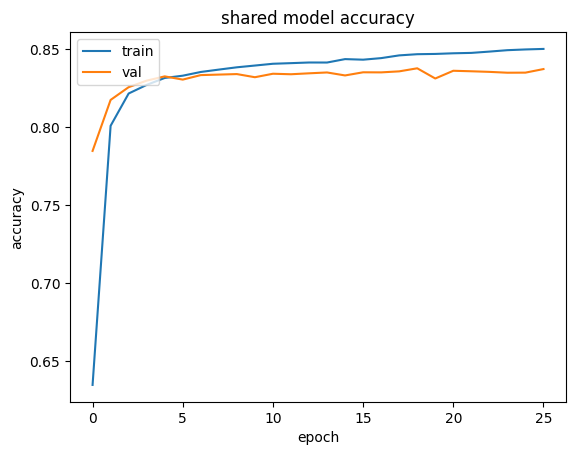

In [40]:
plot_shared(shared_history)

In [41]:
trained_model = os.path.join(os.path.join(MILESTONE_DIR, 'trained_models'),'shared_model.h5')
shared.save(trained_model)

c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\.venv\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### Load Saved Model and Evaluate

In [42]:
shared_trained_model = os.path.join(os.path.join(MILESTONE_DIR, 'trained_models'),'shared_model.h5')
shared_model = load_model(shared_trained_model)

In [43]:
x_test,y_test = generate_inputs_shared(vec_test,args,indexes)

print("Evaluate on test data")

results = shared_model.evaluate(x_test, y_test, batch_size=batch_size)
y_pred_shared = shared_model.predict(x_test)
print("test loss, test acc:", results)

Evaluate on test data
1638/1638 [==============================] - 16s 4ms/step
test loss, test acc: [0.4582643508911133, 0.8267880082130432]


In [44]:
m1_y_test = y_test.argmax(axis=1)
m1_y_pred = y_pred_shared.argmax(axis=1)

Classification Report

In [45]:
target_names = [index_ne[i] for i in range(len(index_ne))]

print(classification_report(y_test.argmax(axis=1), y_pred_shared.argmax(axis=1), target_names=target_names))

                          precision    recall  f1-score   support

              A_Accepted       0.76      0.96      0.85      2669
             A_Cancelled       0.34      0.05      0.08       984
              A_Complete       0.92      0.96      0.94      2888
               A_Concept       0.94      0.88      0.91      2637
                A_Denied       0.29      0.02      0.04       397
            A_Incomplete       0.74      0.89      0.81      2531
               A_Pending       1.00      1.00      1.00      1720
             A_Submitted       1.00      1.00      1.00      1629
            A_Validating       0.81      0.81      0.81      4063
              O_Accepted       0.49      0.45      0.47      1698
             O_Cancelled       0.97      0.82      0.89      2186
          O_Create Offer       0.97      0.71      0.82      3920
               O_Created       1.00      1.00      1.00      4009
               O_Refused       0.98      0.86      0.91       504
         

Confusion Matrix

[[2567    0    0    2    0    0    0    0    0    0    0    1    0    0
     0    0    0    0    0    0   99    0    0]
 [   0   45    4    0    0    0    0    0   21    7    2   10    0    0
     2    8    0    0  789   86    2    0    8]
 [   0    0 2769    1    0    0    0    0    0    0    0    3    1    0
     0   27    0    0    4    1   82    0    0]
 [   0    0    0 2320    0    0    0    1    0    0    0    0    0    0
     0    0    0    0    0    0  316    0    0]
 [   0    2    0    0    8  123    0    0    5   65    0    3    0    0
    10    1    0    0    7   24    0    0  149]
 [   0    0    0    1    6 2254    0    0   12  155    0    0    1    0
    52    0    0    0    3    8    0    0   39]
 [   1    0    0    0    0    1 1715    0    1    0    0    0    0    0
     0    1    0    0    1    0    0    0    0]
 [   0    0    0    0    0    0    0 1629    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    1    0    0    0    7    0    

<Axes: >

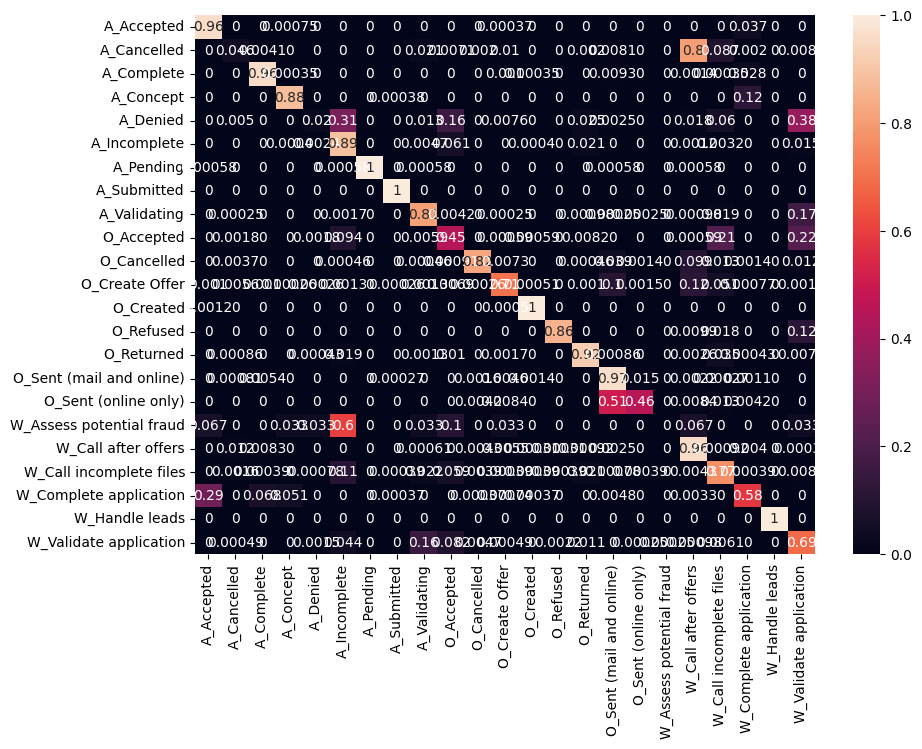

In [46]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_shared.argmax(axis=1))
print(matrix)
matrix_sum = np.sum(matrix, axis=1).reshape(-1,1)
matrix_perc = matrix / matrix_sum
df_cm = pd.DataFrame(matrix_perc, index = [index_ne[i] for i in range(len(index_ne))],
                  columns = [index_ne[i] for i in range(len(index_ne))])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

#### specialised Model

In [47]:
specialised = specialised_model(vec_train, weights, indexes, pre_index, args)


In [48]:
specialised.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [49]:
specialised.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 ac_input (InputLayer)       [(None, 5, 25)]              0         []                            
                                                                                                  
 rl_input (InputLayer)       [(None, 5, 145)]             0         []                            
                                                                                                  
 t_input (InputLayer)        [(None, 5, 1)]               0         []                            
                                                                                                  
 beta_ac (Bidirectional)     (None, 5, 100)               30400     ['ac_input[0][0]']            
                                                                                            

In [50]:
batch_size = 128 # 32, 64, 128, 256
epochs = 200

In [51]:
specialised_history = specialised_model_fit(vec_train, specialised, indexes, pre_index, MY_WORKSPACE_DIR, batch_size, epochs, args)

This is the output file path  c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\Shared-and-Specialised-Attention-based-Interpretable-Models\BPIC17\models\model_specialised_All_{epoch:02d}-{val_loss:.2f}.h5


Epoch 1/200
812/812 [==============================] - 69s 48ms/step - loss: 2.1273 - accuracy: 0.4972 - val_loss: 1.5082 - val_accuracy: 0.6445 - lr: 0.0010
Epoch 2/200
812/812 [==============================] - 31s 38ms/step - loss: 1.3634 - accuracy: 0.5931 - val_loss: 1.1261 - val_accuracy: 0.6794 - lr: 0.0010
Epoch 3/200
812/812 [==============================] - 43s 53ms/step - loss: 1.1283 - accuracy: 0.6457 - val_loss: 0.8953 - val_accuracy: 0.7397 - lr: 0.0010
Epoch 4/200
812/812 [==============================] - 37s 45ms/step - loss: 0.9792 - accuracy: 0.6722 - val_loss: 0.7821 - val_accuracy: 0.7506 - lr: 0.0010
Epoch 5/200
812/812 [==============================] - 38s 46ms/step - loss: 0.9197 - accuracy: 0.6736 - val_loss: 0.7202 - val_accuracy: 0.7503 - lr: 0.0010
Epoch 6/200
812/812 [==============================] - 37s 46ms/step - loss: 0.8679 - accuracy: 0.6846 - val_loss: 0.6636 - val_accuracy: 0.7705 - lr: 0.0010
Epoch 7/200
812/812 [==============================]

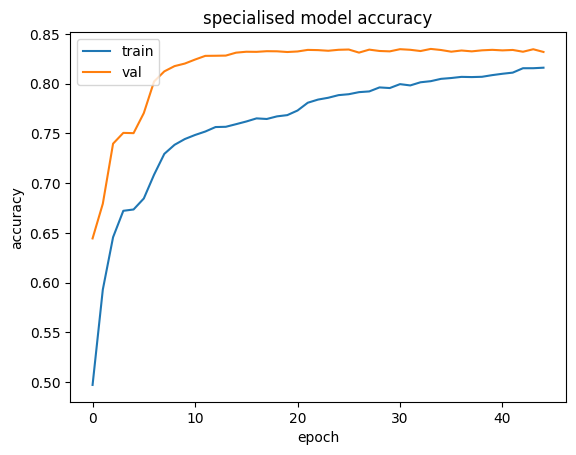

In [52]:
plot_specialised(specialised_history)

In [53]:
trained_model = os.path.join(os.path.join(MILESTONE_DIR, 'trained_models'),'specialised_model_'+str(max_size)+'.h5')
specialised.save(trained_model)

c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\.venv\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### Load Saved Model and Evaluate

In [54]:
trained_model = os.path.join(os.path.join(MILESTONE_DIR, 'trained_models'),'specialised_model_'+str(max_size)+'.h5')
specialised_model = load_model(trained_model)

Evaluating Prediction Performance

In [55]:
# Generating Inputs

x_test,y_test = generate_inputs(vec_test,args,indexes, experiment)

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")

results = specialised_model.evaluate(x_test, y_test, batch_size=batch_size)
y_pred = specialised_model.predict(x_test)
print("test loss, test acc:", results)

Evaluate on test data
1638/1638 [==============================] - 19s 5ms/step
test loss, test acc: [0.48722323775291443, 0.8208152055740356]


In [56]:
m2_y_test = y_test.argmax(axis=1)
m2_y_pred = y_pred.argmax(axis=1)

In [57]:
target_names = [index_ne[i] for i in range(len(index_ne))]

print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85      2669
           1       0.45      0.02      0.04       984
           2       0.91      0.95      0.93      2888
           3       0.89      0.94      0.92      2637
           4       0.35      0.02      0.03       397
           5       0.74      0.88      0.80      2531
           6       1.00      1.00      1.00      1720
           7       1.00      1.00      1.00      1629
           8       0.78      0.85      0.81      4063
           9       0.47      0.37      0.41      1698
          10       0.96      0.83      0.89      2186
          11       0.95      0.71      0.81      3920
          12       1.00      1.00      1.00      4009
          13       0.93      0.85      0.89       504
          14       0.90      0.90      0.90      2323
          15       0.82      0.98      0.89      3703
          16       0.58      0.06      0.11       237
          17       0.00    

c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\20182009\Documents\Master DSAI\y2 q1\2IMI00 seminar process analytics\replicationStudy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-d

Confusion Matrix

[[2592    0    0    1    1    0    0    1    0    0    0    0    0    0
     0    0    0    0    1    0   73    0    0]
 [   0   19    4    0    0    0    0    0   21   12    2   17    0    0
     4   13    0    0  805   77    2    0    8]
 [   0    0 2738    0    0    0    0    1    3    0    0    2    2    0
     0   35    0    0    3    0  104    0    0]
 [   0    0    0 2485    0    0    0    1    0    0    0    0    0    0
     0    0    0    0    0    0  151    0    0]
 [   0    1    0    0    6  103    0    0    4   76    0    5    0    0
    11    0    0    0    9   21    0    0  161]
 [   0    0    0    0    1 2215    0    0    4  158    2    0    1    0
    71    0    0    0    3    7    0    1   68]
 [   1    0    0    0    0    1 1715    0    0    0    0    0    0    0
     0    1    0    0    1    0    0    0    1]
 [   0    0    0    0    0    0    0 1629    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    9    0    

<Axes: >

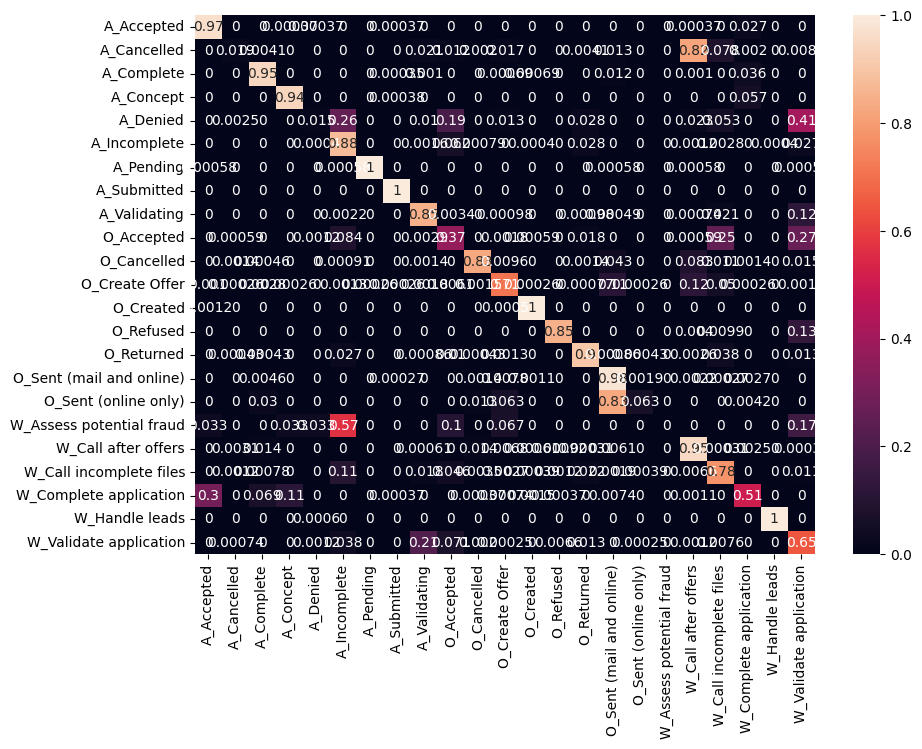

In [58]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)
matrix_sum = np.sum(matrix, axis=1).reshape(-1,1)
matrix_perc = matrix / matrix_sum
df_cm = pd.DataFrame(matrix_perc, index = [index_ne[i] for i in range(len(index_ne))],
                  columns = [index_ne[i] for i in range(len(index_ne))])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [59]:
m1_y_pred
m2_y_test = y_test.argmax(axis=1)
m2_y_pred = y_pred.argmax(axis=1)

In [60]:
import scipy.stats as stats
stats.ttest_ind(st['m1_y_pred'], st['m2_y_pred'])

NameError: name 'st' is not defined

In [ ]:
st.to_csv("st.csv")